In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv', index_col=False, sep=",", header=0)

In [2]:
# Let's take a look at the data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Shape tells us how many rows and columns we have
print(dataset.shape)

(891, 12)


In [ ]:
# MISSING DATA EXPLORATION

In [5]:
# Calculate the number of empty cells in each column
# The following line consists of three commands. Try
# to think about how they work together to calculate
# the number of missing entries per column
missing_data = dataset.isnull().sum().to_frame()

In [7]:
missing_data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


 # MISSING DATA EXPLORATION

In [10]:
import sys

!$sys.executable -m pip install missingno

You should consider upgrading via the '/Users/uczhn/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


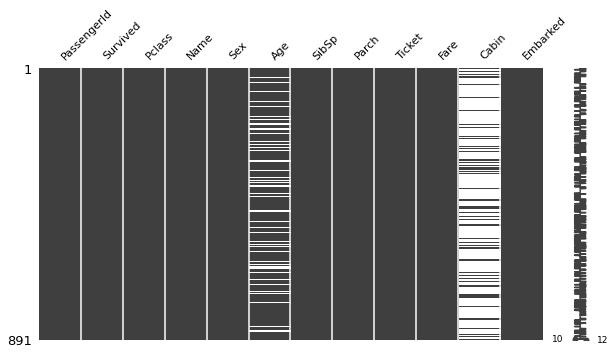

In [11]:
# import missingno package
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(dataset, figsize=(10,5), fontsize=11)

In [13]:
# Select Passengers with unknown age
# Notice how we use .isnull() rows with no value

# this will return a data frame with only  that have missing age
unknown_age = dataset[dataset["Age"].isnull()]

unknown_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [14]:
# Print only the colums we want for the moment (to better fit the screen)
# limit output to 20 rows
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [15]:
# Find those missing age or cabin information
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Find those missing both
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Number of passengers missing age and cabin information:", len(unknown_age_and_cabin))

Number of passengers missing age and cabin information: 158


In [ ]:
# Our suspicions were correct - most passengers missing age information are also missing cabin information.

# Normally, from here, we would want to know why we have this issue. A good hypothesis is that information was not collected 

# well for the passengers with the cheap tickets.

# Let's plot a histogram of ticket classes, and another of just people missing information

In [23]:
import sys

!$sys.executable -m pip install matplotlib


You should consider upgrading via the '/Users/uczhn/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


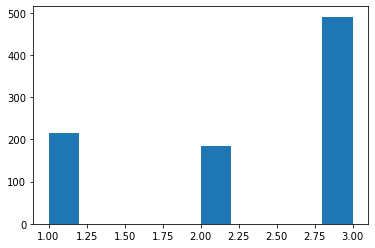

In [26]:
import matplotlib.pyplot as plt

# 'graphing' is custom code we use to make graphs quickly.
# If you would like to read it in detail, it can be found
# in our GitHub repository

plt.hist(dataset.Pclass)
plt.show()

   

(array([ 14.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0., 134.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

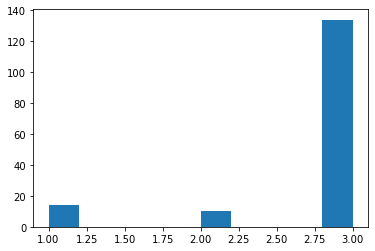

In [27]:
plt.hist(unknown_age_and_cabin.Pclass)

In [ ]:
# MISSING ZERO

In [28]:
import numpy as np

# Print out the average age of passengers we have age data for
mean_age = np.mean(dataset.Age)
print("The average age on the ship was", mean_age, "years old")

# Now make another model where missing ages contained a 0
dataset['Age_2'] = dataset['Age'].fillna(0)

The average age on the ship was 29.69911764705882 years old


In [30]:
mean_age = np.mean(dataset.Age_2)
print("The average age on the ship was", mean_age, "years old")

The average age on the ship was 23.79929292929293 years old


(array([227.,  33., 164., 181., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

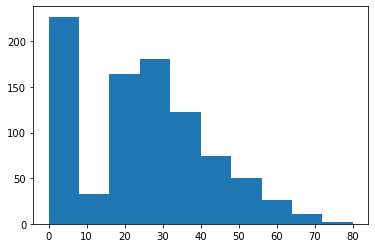

In [31]:
plt.hist(dataset.Age_2)

In [ ]:
# this shows an unlikely high number of 0

In [ ]:
# HANDLING MISSING DATA

In [32]:
# Create a "clean" dataset where we cumulatively fix missing values
# Start by removing rows ONLY where "Embarked" has no values
print(f"The original size of our dataset was", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])


The original size of our dataset was (891, 13)


In [33]:
clean_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


In [37]:
clean_dataset = clean_dataset.reindex()

# How many rows do we have now?
print("The shape for the clean dataset is", clean_dataset.shape)

The shape for the clean dataset is (889, 13)


In [38]:
#clean_dataset

# option 2: Replace empty values with the mean or median for that data

In [39]:
# Calculate the mean value for the Age column
mean_age = clean_dataset["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_dataset["Age"].fillna(mean_age, inplace=True)



The mean age is 29.64209269662921


In [41]:
# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
Age_2                  0


# Option 3: Assign a new category to unknown categorical data

In [42]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


In [43]:
clean_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,Unknown,S,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,26.0


In [44]:
import pandas as pd

# Load data from our dataset file into a pandas dataframe

dataset = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv', index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# this gives a brief summary of data types

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:

dataset = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv', index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# VISUALISING ORDINAL DATA

In [53]:
dataset



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfbc855790>]],
      dtype=object)

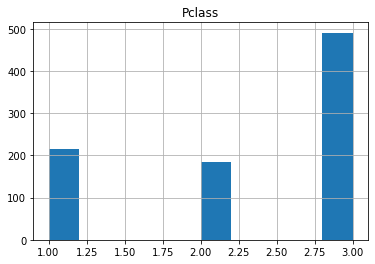

In [61]:
import matplotlib.pyplot as plot
dataset.hist(column=['Pclass'])

In [75]:
import pandas
# Open our dataset from file
dataset = pandas.read_csv("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv",
                          index_col=False, sep=",", header=0)

In [76]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
# Fill missing cabin information with 'Unknown'
dataset["Cabin"].fillna("Unknown", inplace=True)

dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
# Remove rows missing Age information
dataset.dropna(subset=["Age"], inplace=True)

dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Unknown,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
# Remove the Name, PassengerId, and Ticket fields
# This is optional and only to make it easier to read our print-outs
dataset.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


# BINARTY CATEGIORICAL FEATURES

In [81]:
# Swap male / female with numerical values
# We can do this because there are only two categories
dataset["IsFemale"] = dataset.Sex.replace({'male':0, 'female':1})


In [82]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale
0,0,3,male,22.0,1,0,7.2500,Unknown,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,Unknown,S,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,Unknown,S,0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Unknown,Q,1
886,0,2,male,27.0,0,0,13.0000,Unknown,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,1
889,1,1,male,26.0,0,0,30.0000,C148,C,0


# One-Hot Encoding of Ordinal variables

In [83]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {dataset['Pclass'].unique()}")



Possible values for PClass: [3 1 2]


In [84]:
print(dataset['Pclass'].unique())

[3 1 2]


In [86]:
# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass"], drop_first=False)

dataset_with_one_hot

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,Unknown,S,0,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0
2,1,female,26.0,0,0,7.9250,Unknown,S,1,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0
4,0,male,35.0,0,0,8.0500,Unknown,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Unknown,Q,1,0,0,1
886,0,male,27.0,0,0,13.0000,Unknown,S,0,0,1,0
887,1,female,19.0,0,0,30.0000,B42,S,1,1,0,0
889,1,male,26.0,0,0,30.0000,C148,C,0,1,0,0


In [87]:
# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = dataset.Pclass

# Print out the first few rows
dataset_with_one_hot
# Pclass_1, Pclass_2 and Pclass_3

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale,Pclass_1,Pclass_2,Pclass_3,Pclass
0,0,male,22.0,1,0,7.2500,Unknown,S,0,0,0,1,3
1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0,1
2,1,female,26.0,0,0,7.9250,Unknown,S,1,0,0,1,3
3,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,1
4,0,male,35.0,0,0,8.0500,Unknown,S,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Unknown,Q,1,0,0,1,3
886,0,male,27.0,0,0,13.0000,Unknown,S,0,0,1,0,2
887,1,female,19.0,0,0,30.0000,B42,S,1,1,0,0,1
889,1,male,26.0,0,0,30.0000,C148,C,0,1,0,0,1


In [88]:
print(dataset['Cabin'].unique())
#. there are juist to many categorties of cabin  class

['Unknown' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'D33'
 'B30' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'D47' 'B86' 'F2' 'C2' 'B19' 'A7' 'C49' 'F4' 'B4' 'B80'
 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67' 'B94' 'C125' 'C99'
 'C118' 'D7' 'B49' 'D' 'C22 C26' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7'
 'E34' 'C32' 'B18' 'C124' 'C91' 'E40' 'T' 'E33' 'D37' 'B35' 'E50' 'C82'
 'B96 B98' 'E10' 'C52' 'E44' 'A34' 'C104' 'C111' 'C92' 'E38' 'E12' 'E63'
 'B37' 'C30' 'D20' 'B79' 'E25' 'D46' 'B73' 'B38' 'B39' 'B22' 'C86' 'C70'
 'A16' 'C101' 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50'
 'A26' 'D48' 'E58' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64'
 'E24' 'C90' 'C126' 'C45' 'E8' 'B101' 'C46' 'D30' 'E121' 'D11' 'E77' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B69' 'E49' 'D28' 'E17' 'A24' 'C50' 'B42'
 'C148']


In [90]:
# Use Pandas to One-Hot encode the Cabin and Pclass categories
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass", "Cabin"], drop_first=False)
dataset_with_one_hot

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,IsFemale,Pclass_1,Pclass_2,...,Cabin_E77,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown
0,0,male,22.0,1,0,7.2500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,S,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,female,39.0,0,5,29.1250,Q,1,0,0,...,0,0,0,0,0,0,0,0,0,1
886,0,male,27.0,0,0,13.0000,S,0,0,1,...,0,0,0,0,0,0,0,0,0,1
887,1,female,19.0,0,0,30.0000,S,1,1,0,...,0,0,0,0,0,0,0,0,0,0
889,1,male,26.0,0,0,30.0000,C,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Find cabin column names
cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

# Print out how many cabins there were
print(len(cabin_column_names), "cabins found")

135 cabins found
